In [1]:
import PIL.ImageOps
import requests
from PIL import Image
import matplotlib.pyplot as plt
from data_manipulation import cifar10_transform
from utils import prepare_device, im_convert
from torch import load, max

In [3]:
file = 'trained_models/SimpleNet.pth'
model = load(file)

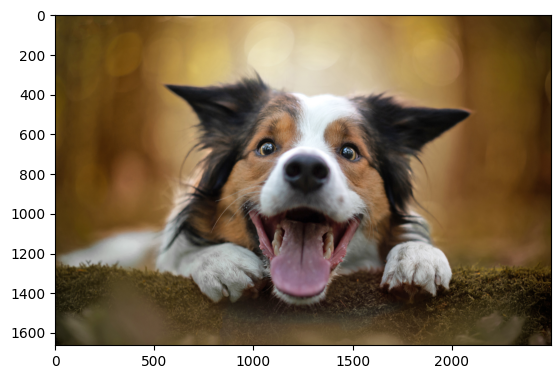

In [4]:
url = 'https://media-cldnry.s-nbcnews.com/image/upload/rockcms/2022-08/220805-border-collie-play-mn-1100-82d2f1.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)
plt.show()

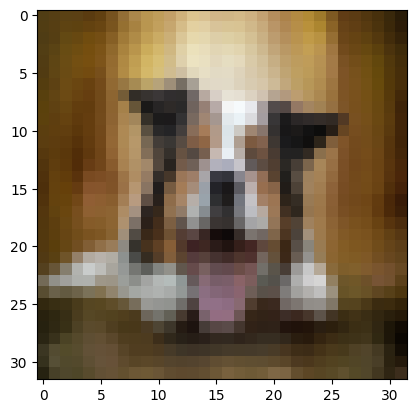

In [54]:
transform = cifar10_transform()
img_transformed = transform(img)  # applying the transformations on new image as our model has been trained on these transformations
plt.imshow(im_convert(img_transformed)) # convert to numpy array for plt
plt.show()

In [59]:


device = prepare_device()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

image = img_transformed.to(device).unsqueeze(0) # put inputs in device as our model is running there
output = model(image)
_, pred = max(output, 1)
print("This image shows a {0}".format(classes[pred.item()]))

This image shows a dog


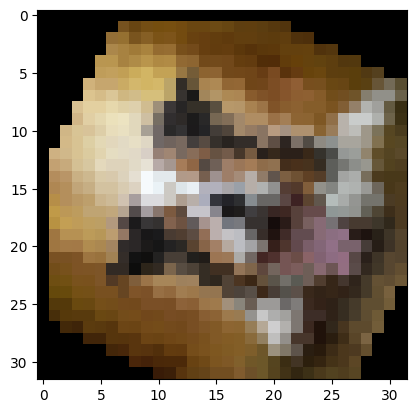

In [53]:
from torchvision import transforms

transform_train = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.RandomRotation(90),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


img_transformed = transform_train(img)  # applying the transformations on new image as our model has been trained on these transformations
plt.imshow(im_convert(img_transformed)) # convert to numpy array for plt
plt.show()

[0 1 2 0 1 2 0 1 2 3]
[0 1 1 0 2 1 0 1 2 1]
[[1.         0.         0.         0.        ]
 [0.         0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333 0.        ]
 [0.         1.         0.         0.        ]]


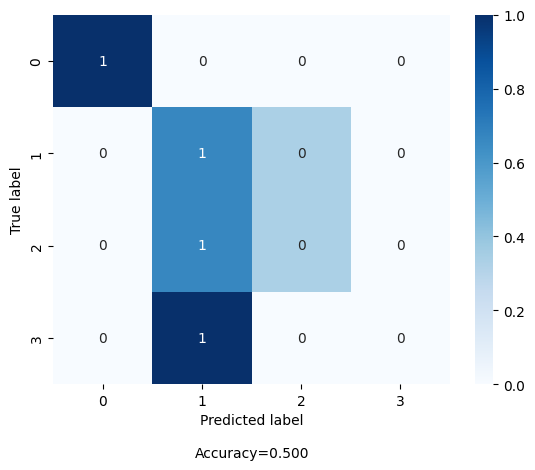

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from utils import make_confusion_matrix
import numpy as np

n_classes = 10

true_values = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2, 3])  # Valores verdaderos
pred_values = np.array([0, 1, 1, 0, 2, 1, 0, 1, 2, 1])

classes = ["A","B","C","D","E","F","G","H","I","J"]

# Calcular la matriz de confusión
print(true_values)
print(pred_values)
cm = confusion_matrix(true_values, pred_values)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print(cm_normalized)
make_confusion_matrix(cm_normalized)
plt.show()

In [1]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


labels = ["Cat","Dog","Plane","Frog"]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True)

NameError: name 'cm' is not defined

In [78]:
confusion_matrix = np.array([[10, 5, 0],
                             [3, 15, 2],
                             [1, 2, 7]])

# Normalizar la matriz de confusión
normalized_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

print(normalized_matrix)

[[0.66666667 0.33333333 0.        ]
 [0.15       0.75       0.1       ]
 [0.1        0.2        0.7       ]]


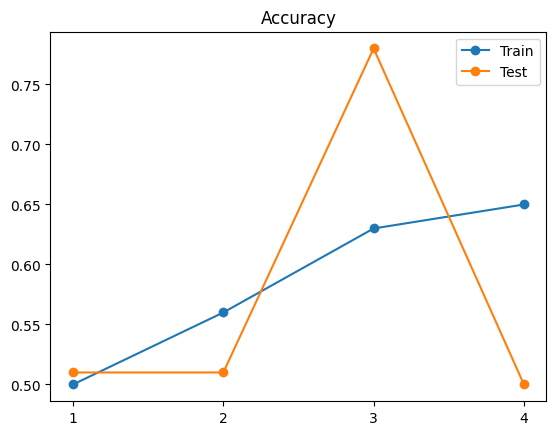

In [12]:
import numpy as np
acc_train = np.array([0.5, 0.56, 0.63, 0.65])
acc_test = np.array([0.51, 0.51, 0.78, 0.5])
n_epochs = 4
epochs = np.arange(1,n_epochs+1)
plt.plot(epochs, acc_train, '-o', label = "Train")
plt.plot(epochs, acc_test, '-o',label = "Test")

plt.xticks(epochs)
plt.title("Accuracy")
plt.legend()


In [ ]:
from trainer import 